In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = "chess_players.csv"
    
df = pd.read_csv(file)
display(df)


,Name,Title,Tr_title,Federation,Rating,Birth,Gender,White_total,White_wins,White_draws,Black_total,Black_wins,Black_draws
0,"Carlsen, Magnus",GM,NaN,NOR,2853,1990,Male,512,241,231,502,125,332
1,"Nepomniachtchi, Ian",GM,NaN,RUS,2794,1990,Male,519,208,253,506,126,288
2,"Ding, Liren",GM,NaN,CHN,2789,1992,Male,540,235,266,524,153,299
3,"Firouzja, Alireza",GM,NaN,FRA,2785,2003,Male,472,264,145,451,209,132
4,"Nakamura, Hikaru",GM,NaN,USA,2775,1987,Male,557,231,272,538,168,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11109,"Nuha, Rilwan",WFM WFM,NaN,MDV,1093,2005,Female,70,23,8,69,20,10
11110,"Dlamini, Nosipho",WCM WCM,NaN,SWZ,1080,1996,Female,72,27,6,71,24,4
11111,Manikonda Naga Sai Hasitha,WCM WCM,NaN,BOT,1048,2010,Female,72,32,5,68,22,1
11112,"Shah, Janvi Nipul",WCM WCM,NaN,KEN,1039,2010,Female,43,21,2,46,19,2


Usuwam niepotrzebne kolumny i filtruję dane - w modelu chcę uwzględnić dane szachistów, którzy mają w bazie conajmniej 200 rozgranych gier. Następnie przetwarzam dane i dodaję nowe kolunmny.

In [20]:
import datetime

df = df.drop('Tr_title', axis=1)
df = df[df['White_total'] + df['Black_total'] >= 200]
df = df[df['Birth'] != 0]

white_total = df['White_total']
white_wins = df['White_wins']
white_draws = df['White_draws']
black_total = df['Black_total']
black_wins = df['Black_wins']
black_draws = df['Black_draws']
zipped = zip(white_total, white_wins, white_draws, black_total, black_wins, black_draws)
winning_rates = []
draw_rates = []
winning_rates_white = []
winning_rates_black = []
draw_rates_white = []
draw_rates_black = []
for wt, ww, wd, bt, bw, bd in zipped:
    winning_rate = (ww + bw)/(wt + bt)
    draw_rate = (wd + bd)/(wt + bt)
    winning_white = ww/wt
    winning_black = bw/bt
    draw_rate_white = wd/wt
    draw_rate_black = bd/bt
    winning_rates.append(winning_rate)
    draw_rates.append(draw_rate)
    winning_rates_white.append(winning_white)
    winning_rates_black.append(winning_black)
    draw_rates_white.append(draw_rate_white)
    draw_rates_black.append(draw_rate_black)

df['Winning_rate'] = winning_rates
df['Draw_rate'] = draw_rates
df['Winning_rates_white'] = winning_rates_white
df['Winning_rates_black'] = winning_rates_black
df['Draw_rates_white'] = draw_rates_white
df['Draw_rates_black'] = draw_rates_black

ages = datetime.datetime.now().year - df['Birth']
df=df.drop('Birth', axis=1)
df['Age'] = ages

display(df)

,Name,Title,Federation,Rating,Gender,White_total,White_wins,White_draws,Black_total,Black_wins,Black_draws,Winning_rate,Draw_rate,Winning_rates_white,Winning_rates_black,Draw_rates_white,Draw_rates_black,Age
0,"Carlsen, Magnus",GM,NOR,2853,Male,512,241,231,502,125,332,0.360947,0.555227,0.470703,0.249004,0.451172,0.661355,33
1,"Nepomniachtchi, Ian",GM,RUS,2794,Male,519,208,253,506,126,288,0.325854,0.527805,0.400771,0.249012,0.487476,0.569170,33
2,"Ding, Liren",GM,CHN,2789,Male,540,235,266,524,153,299,0.364662,0.531015,0.435185,0.291985,0.492593,0.570611,31
3,"Firouzja, Alireza",GM,FRA,2785,Male,472,264,145,451,209,132,0.512459,0.300108,0.559322,0.463415,0.307203,0.292683,20
4,"Nakamura, Hikaru",GM,USA,2775,Male,557,231,272,538,168,285,0.364384,0.508676,0.414722,0.312268,0.488330,0.529740,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098,"Kaval, Zeynep Ruya",WCM WCM,TUR,1254,Female,107,49,16,97,42,13,0.446078,0.142157,0.457944,0.432990,0.149533,0.134021,15
11099,"Gonzalez Gonzalez, Agustin",CM,CHI,1243,Male,104,45,8,110,47,14,0.429907,0.102804,0.432692,0.427273,0.076923,0.127273,14
11103,"Gunawardena, I M T S",WCM WCM,SRI,1170,Female,216,112,18,220,108,17,0.504587,0.080275,0.518519,0.490909,0.083333,0.077273,16
11108,"Eisa Mohmood, Alkhoori",CM,UAE,1095,Male,142,80,8,145,58,9,0.480836,0.059233,0.563380,0.400000,0.056338,0.062069,16


Wstępna analiza danych:
- zależność między rankingiem elo a wskaźnikiem wygranych
- zależność między rankingiem elo a wskaźnikiem remisów
- zależność między rankingiem elo a wiekiem szachisty
- zależność między średnim rankigiem elo a tytułem szachowym
- zależność między średnim rankigiem elo a federacją


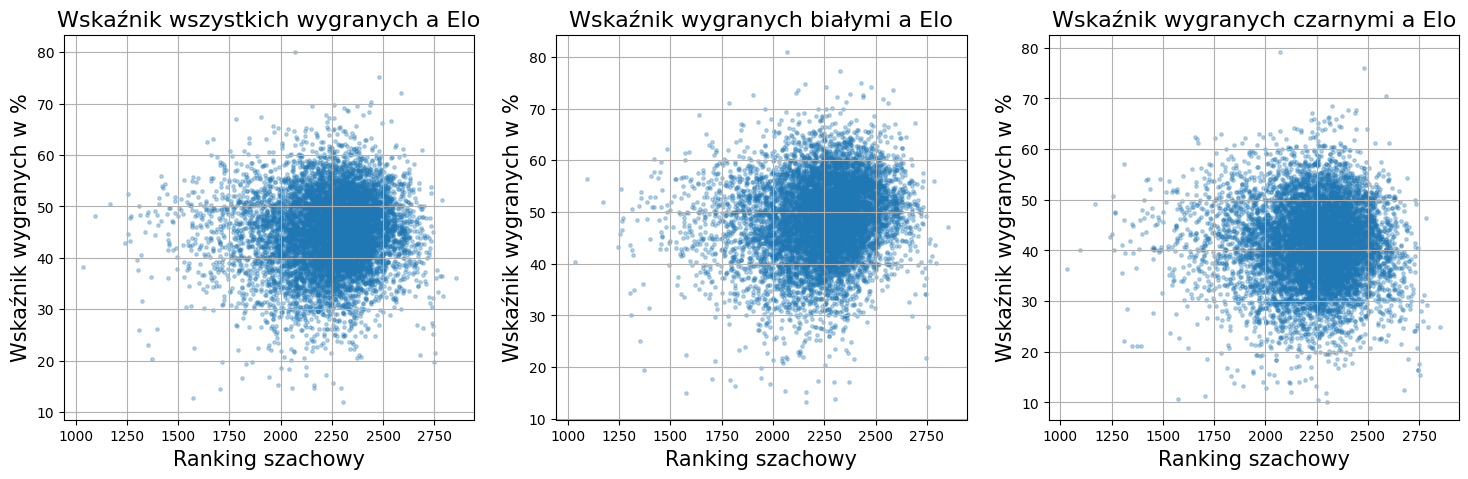

In [21]:
X = df['Rating'].values
Y1 = df['Winning_rate'].values*100
Y2 = df['Winning_rates_white'].values*100
Y3 = df['Winning_rates_black'].values*100

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)
for ax in fig.get_axes():
 ax.set_xlabel(xlabel='Ranking szachowy', fontsize=15)
 ax.set_ylabel(ylabel='Wskaźnik wygranych w %', fontsize=15)
 ax.grid(True)

ax1.scatter(X, Y1, s=6, alpha=0.3)
ax1.set_title("Wskaźnik wszystkich wygranych a Elo", fontsize=16)
ax2.scatter(X, Y2, s=6, alpha=0.3)
ax2.set_title("Wskaźnik wygranych białymi a Elo", fontsize=16)
ax3.scatter(X, Y3, s=6, alpha=0.3)
ax3.set_title("Wskaźnik wygranych czarnymi a Elo", fontsize=16)
plt.savefig("Wygrane_vs_elo.png")
plt.show()

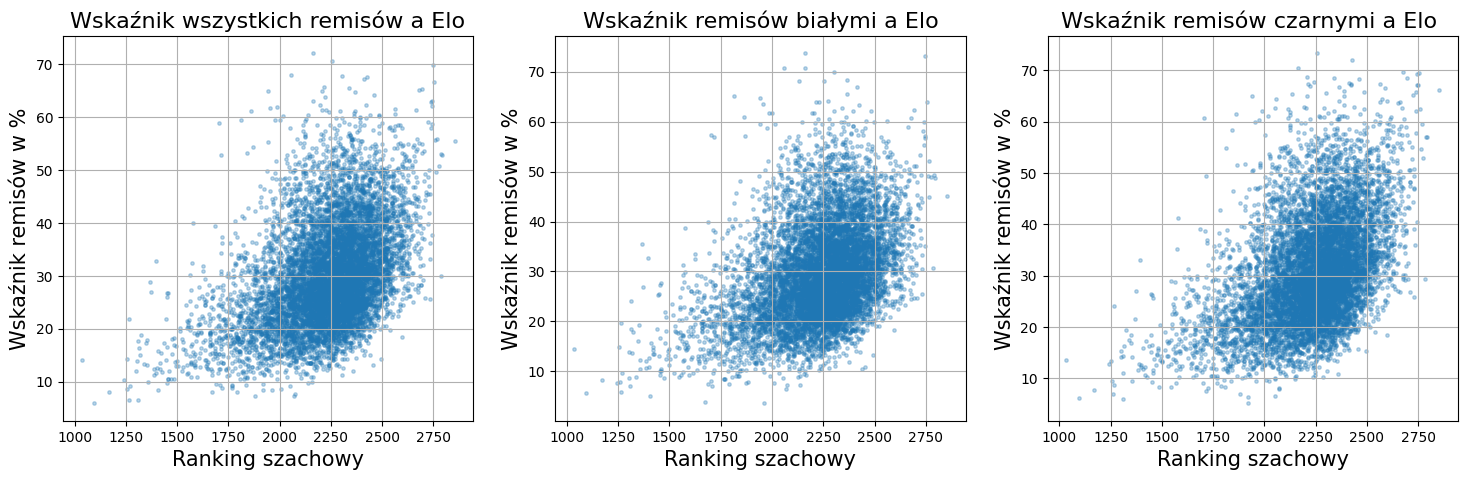

In [22]:
X = df['Rating'].values
Y1 = df['Draw_rate'].values*100
Y2 = df['Draw_rates_white'].values*100
Y3 = df['Draw_rates_black'].values*100

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)
for ax in fig.get_axes():
 ax.set_xlabel(xlabel='Ranking szachowy', fontsize=15)
 ax.set_ylabel(ylabel='Wskaźnik remisów w %', fontsize=15)
 ax.grid(True)

ax1.scatter(X, Y1, s=6, alpha=0.3)
ax1.set_title("Wskaźnik wszystkich remisów a Elo", fontsize=16)
ax2.scatter(X, Y2, s=6, alpha=0.3)
ax2.set_title("Wskaźnik remisów białymi a Elo", fontsize=16)
ax3.scatter(X, Y3, s=6, alpha=0.3)
ax3.set_title("Wskaźnik remisów czarnymi a Elo ", fontsize=16)
plt.show()

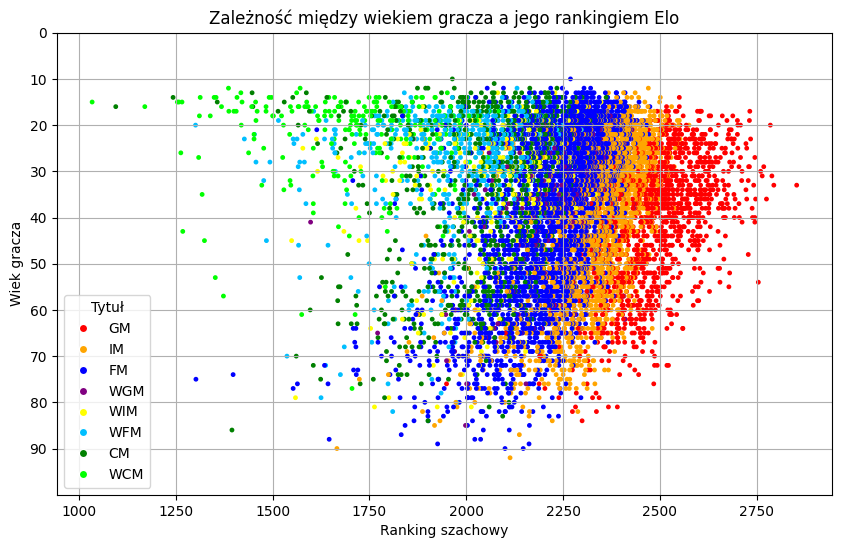

In [23]:
elo_ranking = df['Rating']
ages = df['Age']
player_titles = df['Title']

first_titles = [title.split()[0] for title in player_titles]
title_colors = {
    'GM': 'red',
    'IM': 'orange',
    'FM': 'blue',
    'WGM': 'purple',
    'WIM': 'yellow',
    'WFM': 'deepskyblue',
    'CM': 'green',
    'WCM': 'lime',
    }

colors = [title_colors[title] for title in first_titles]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=6)
                    for color in title_colors.values()]

legend_labels = list(title_colors.keys())

plt.figure(figsize=(10, 6))
plt.legend(legend_handles, legend_labels, loc='lower left', title="Tytuł")

plt.scatter(x=elo_ranking, y=ages, c=colors, s=6)
plt.xlabel('Ranking szachowy')
plt.ylabel('Wiek gracza')
plt.title('Zależność między wiekiem gracza a jego rankingiem Elo')
plt.ylim(100, 0)
plt.yticks(np.arange(0, 100, 10))
plt.grid(True)
plt.show()

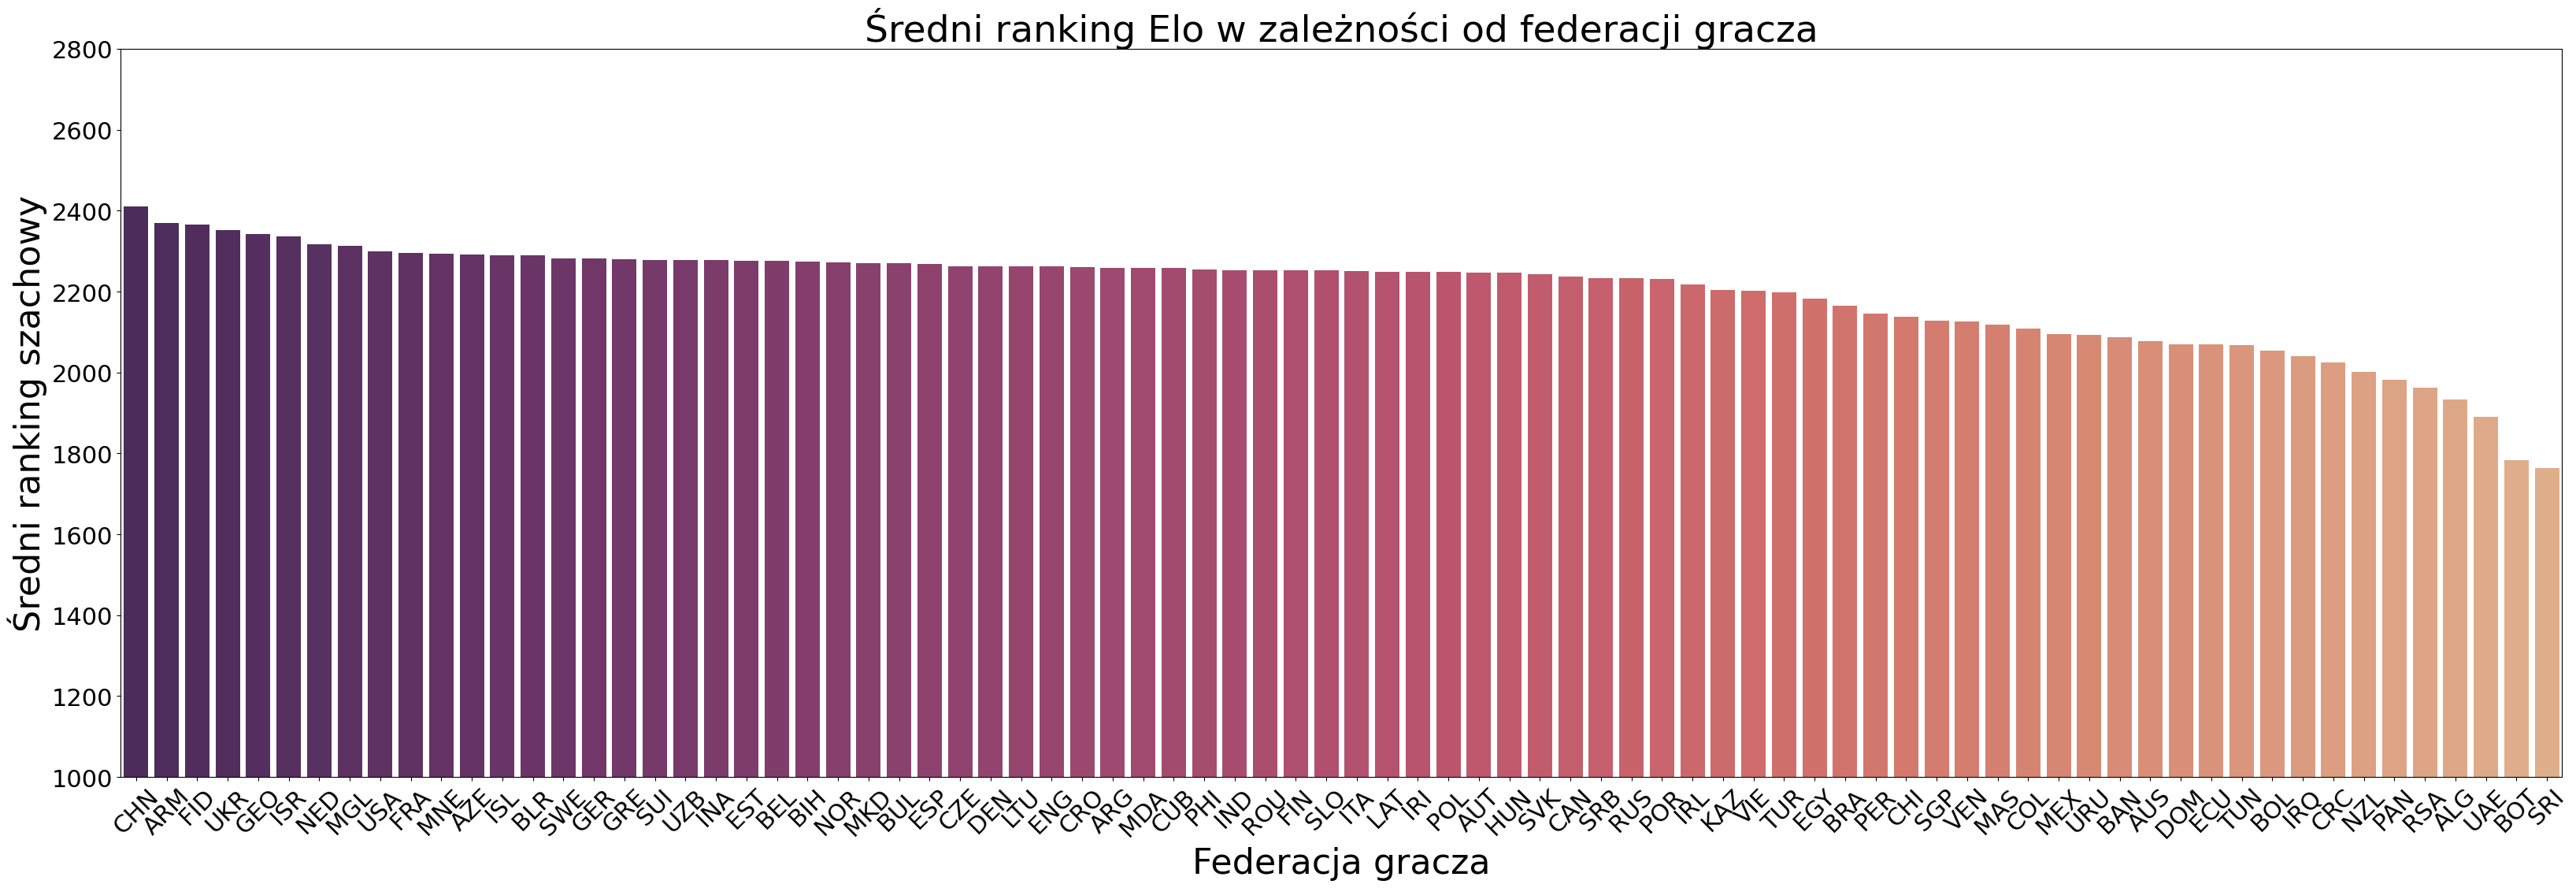

In [24]:
import seaborn as sns
fed_count = df['Federation'].value_counts()
chosen_fed = fed_count[fed_count >= 20].index.tolist()
fed_elo_avg = df[df['Federation'].isin(chosen_fed)].groupby('Federation')['Rating'].mean().reset_index()
#title_elo_avg = df.groupby('Federation')['Rating'].mean().reset_index()
fed_elo_avg = fed_elo_avg.sort_values('Rating', ascending=False)

plt.figure(figsize=(40,12))
sns.barplot(x='Federation', y='Rating', data=fed_elo_avg, palette='flare_r')

plt.ylabel('Średni ranking szachowy', fontsize=32)
plt.xlabel('Federacja gracza', fontsize=32)
plt.ylim(1000, 2800)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.title('Średni ranking Elo w zależności od federacji gracza', fontsize=34)
plt.show()

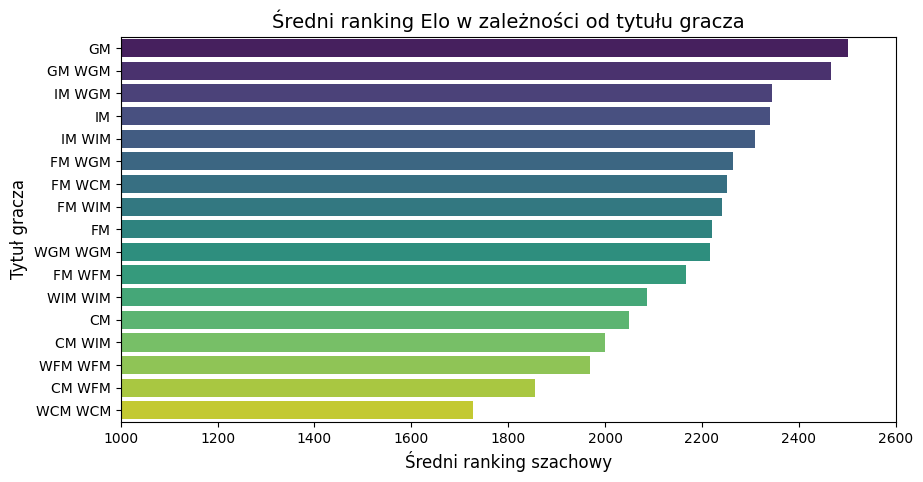

In [25]:
import seaborn as sns


title_elo_avg = df.groupby('Title')['Rating'].mean().reset_index()

title_elo_avg = title_elo_avg.sort_values('Rating', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Title', data=title_elo_avg, palette='viridis')

plt.ylabel('Tytuł gracza', fontsize=12)
plt.xlabel('Średni ranking szachowy', fontsize=12)
plt.xlim(1000, 2600)
plt.title('Średni ranking Elo w zależności od tytułu gracza', fontsize=14)

plt.show()



In [26]:
title_elo_avg = df.groupby('Title')['Rating'].mean()

title_elo_avg = title_elo_avg.sort_values(ascending=False)

title_to_number = {title: i+1 for i, title in enumerate(title_elo_avg.index)}

df['Title_number'] = df['Title'].map(title_to_number)


In [27]:
df = df.drop('Title', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Federation', axis=1)
df.to_csv('chess_players_cleaned.csv', index=False)

In [28]:
df = pd.read_csv('chess_players_cleaned.csv')

**REGRESJA SVM**


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split


columns = ['Winning_rate', 'Draw_rate','Age', 'Title_number']

X=df[columns].values
y=np.array(df['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, shuffle=True)


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)

[[-1.0321779   0.83134819 -1.20547701  0.25512768]
 [ 0.53402716 -0.29923967 -0.12354756  0.25512768]
 [-0.13217077 -0.35477352 -1.02515543 -0.87314456]
 ...
 [-0.51432893 -0.53634695 -0.84483386  1.60905437]
 [-1.09063973 -0.18106884 -0.42408352  1.60905437]
 [-0.69883697  0.42796361  0.35730997  0.25512768]]


**Testowanie modelu dla różnych parametrów gamma i C**


In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svr_1 = SVR(kernel='rbf', gamma=0.01, C=10)
svr_1.fit(X_train_sc, y_train)
y_pred_1 = svr_1.predict(X_test_sc)

svr_2 = SVR(kernel='rbf', gamma=0.1, C=10)
svr_2.fit(X_train_sc, y_train)
y_pred_2 = svr_2.predict(X_test_sc)

svr_3 = SVR(kernel='rbf', gamma=1, C=10)
svr_3.fit(X_train_sc, y_train)
y_pred_3 = svr_3.predict(X_test_sc)

svr_4 = SVR(kernel='rbf', gamma=10, C=10)
svr_4.fit(X_train_sc, y_train)
y_pred_4 = svr_4.predict(X_test_sc)

svr_5 = SVR(kernel='rbf', gamma=0.15, C=0.1)
svr_5.fit(X_train_sc, y_train)
y_pred_5 = svr_5.predict(X_test_sc)

svr_6 = SVR(kernel='rbf', gamma=0.15, C=1)
svr_6.fit(X_train_sc, y_train)
y_pred_6 = svr_6.predict(X_test_sc)

svr_7 = SVR(kernel='rbf', gamma=0.15, C=50)
svr_7.fit(X_train_sc, y_train)
y_pred_7 = svr_7.predict(X_test_sc)

svr_8 = SVR(kernel='rbf', gamma=0.15, C=100)
svr_8.fit(X_train_sc, y_train)
y_pred_8 = svr_8.predict(X_test_sc)


In [35]:
def calculate_metrics(y_test, y_pred, model):
    print("Kernel:", model.kernel)
    print("Gamma:", model.gamma)
    print("C:", model.C)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("R-squared (R2): ", r2)
    print()

In [36]:
print("Model1")
calculate_metrics(y_test, y_pred_1, svr_1)

print("Model2")
calculate_metrics(y_test, y_pred_2, svr_2)

print("Model3")
calculate_metrics(y_test, y_pred_3, svr_3)

print("Model4")
calculate_metrics(y_test, y_pred_4, svr_4)

print("Model5")
calculate_metrics(y_test, y_pred_5, svr_5)

print("Model6")
calculate_metrics(y_test, y_pred_6, svr_6)

print("Model7")
calculate_metrics(y_test, y_pred_7, svr_7)

print("Model8")
calculate_metrics(y_test, y_pred_8, svr_8)

Model1
Kernel: rbf
Gamma: 0.01
C: 10
Mean Squared Error:  13277.921605087553
Mean Absolute Error:  80.55683421372231
R-squared (R2):  0.6971359428838362

Model2
Kernel: rbf
Gamma: 0.1
C: 10
Mean Squared Error:  11748.159464698976
Mean Absolute Error:  78.0699727890545
R-squared (R2):  0.7320292026906474

Model3
Kernel: rbf
Gamma: 1
C: 10
Mean Squared Error:  13350.555453390862
Mean Absolute Error:  80.706488104079
R-squared (R2):  0.6954791939862774

Model4
Kernel: rbf
Gamma: 10
C: 10
Mean Squared Error:  30214.21453688591
Mean Absolute Error:  119.07504265216866
R-squared (R2):  0.31082590563622314

Model5
Kernel: rbf
Gamma: 0.15
C: 0.1
Mean Squared Error:  31534.83373611861
Mean Absolute Error:  125.20173581610845
R-squared (R2):  0.28070311228941924

Model6
Kernel: rbf
Gamma: 0.15
C: 1
Mean Squared Error:  16209.022340066598
Mean Absolute Error:  87.70134195900522
R-squared (R2):  0.6302787127528958

Model7
Kernel: rbf
Gamma: 0.15
C: 50
Mean Squared Error:  10572.06062710735
Mean Ab

In [16]:
diff = np.abs(y_test - y_pred_8)
print(np.mean(diff))
print(np.min(diff))
print(np.max(diff))
print(np.mean(y_pred_8))
print(np.min(y_pred_8))
print(np.max(y_pred_8))
print(np.std(y_pred_8))

74.60237351933884
0.013851693297056045
547.712103055409
2243.8777920525686
1657.3531437776828
2621.2356985946503
171.6125336464579


In [37]:
def plot_regression(y_test, y_pred, string):
    plt.figure(figsize=(7,7))
    plt.scatter(y_test, y_pred, label='Ranking szachisty', s=5, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linia idealnego dopasowania')
    plt.xlabel('Rzeczywisty ranking Elo', fontsize=12)
    plt.ylabel('Przewidziany ranking Elo', fontsize=12)
    plt.title(f'Model {string}: Rzeczywisty vs. Przewidziany ranking Elo', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

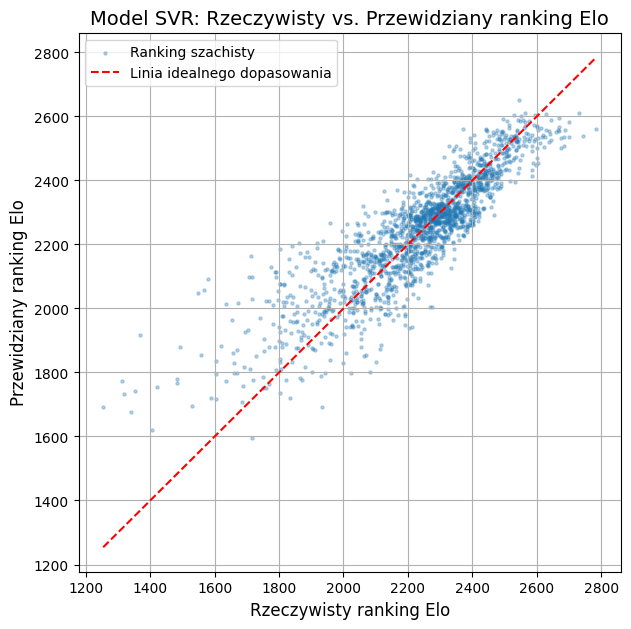

In [38]:
plot_regression(y_test, y_pred_8, "SVR")